In [4]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load and Preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
# Display dataset information
print("Number of training samples:", len(x_train))
print("Number of testing samples:", len(x_test))
print("Shape of an individual sample:", x_train[0].shape)

Number of training samples: 60000
Number of testing samples: 10000
Shape of an individual sample: (28, 28)


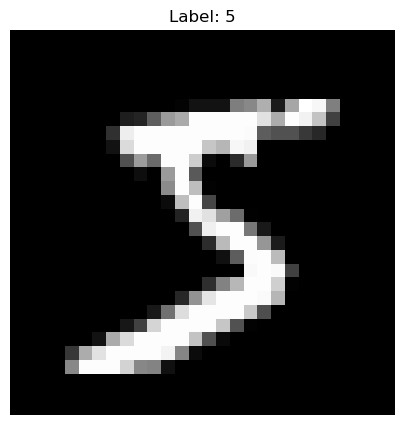

In [8]:
# Visualize a Sample Image
plt.figure(figsize=(5, 5))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [9]:
# Scale the data so that the values are from 0 - 1
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
# Flatten the Data
x_train_flattened = x_train.reshape(len(x_train), -1)
x_test_flattened = x_test.reshape(len(x_test), -1)

In [12]:
# Build and Compile the Simple Model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Train the Model
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 0.4667 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3032 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2833 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2729 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2668 - accuracy: 0.9259


In [13]:
# Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(x_test_flattened, y_test)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")
model.fit(x_train_flattened, y_train, epochs=5)

313/313 [==============================] - 2s 3ms/step - loss: 0.2704 - accuracy: 0.9245
Test loss: 0.2704, Test accuracy: 0.9245
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2621 - accuracy: 0.9270
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2581 - accuracy: 0.9281
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2554 - accuracy: 0.9294
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2530 - accuracy: 0.9299
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2511 - accuracy: 0.9310


In [14]:
# Make Predictions on Test Data
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 3ms/step


In [15]:
# Create Confusion Matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

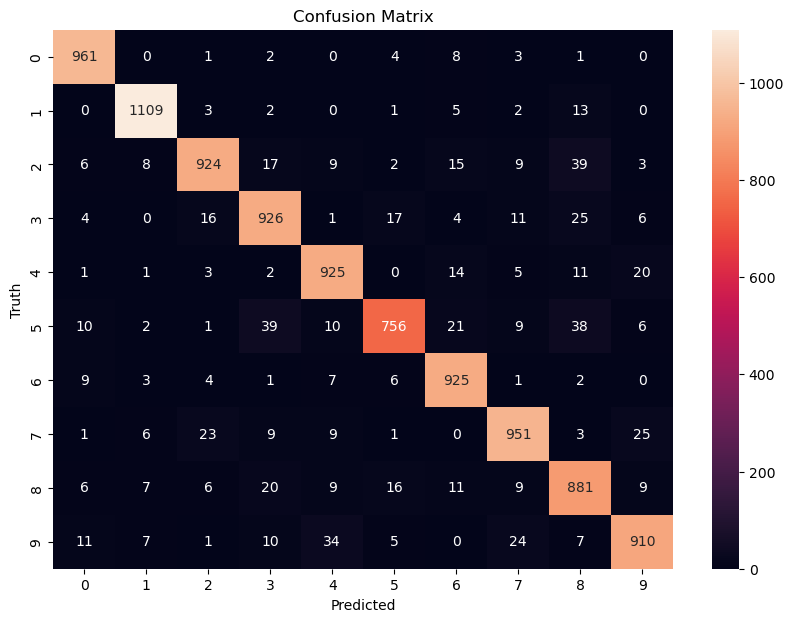

In [16]:
# Plot Confusion Matrix
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Build and Compile a Model with Hidden Layer
model_with_hidden = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_with_hidden.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Train the Model with Hidden Layer
model_with_hidden.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2778 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1291 - accuracy: 0.9618
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0915 - accuracy: 0.9726
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0695 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0553 - accuracy: 0.9830


In [18]:
# Evaluate the Model with Hidden Layer on Test Data
hidden_test_loss, hidden_test_accuracy = model_with_hidden.evaluate(x_test_flattened, y_test)
print(f"Test accuracy with hidden layer: {hidden_test_accuracy:.4f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0801 - accuracy: 0.9752
Test accuracy with hidden layer: 0.9752


In [19]:
# Display Sample Predictions
sample_indices = np.random.randint(0, len(x_test), size=5)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

# Flatten the sample images
sample_images_flattened = sample_images.reshape(len(sample_images), -1)

sample_predictions = model_with_hidden.predict(sample_images_flattened)
predicted_classes = np.argmax(sample_predictions, axis=1)

1/1 [==============================] - 0s 123ms/step


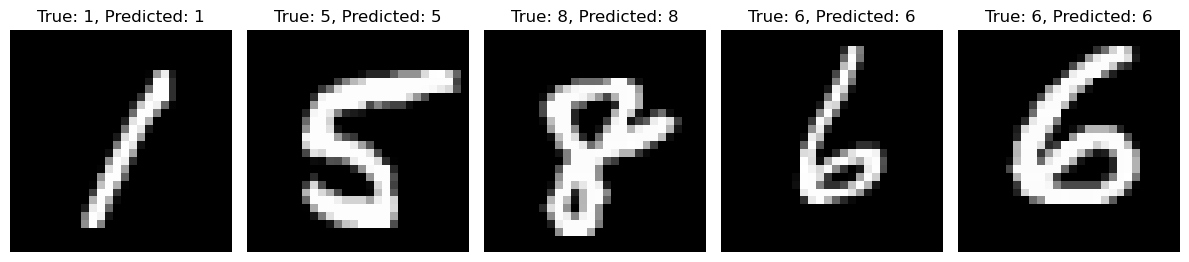

In [20]:
# Display Sample Images, True Labels, and Predicted Labels
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"True: {sample_labels[i]}, Predicted: {predicted_classes[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()